In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('lr_ex.csv')
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [2]:
X = df["X"].to_numpy().reshape(-1,1) # convert into numpy array and then reshape it to a single varibale 
y = df["Y"].to_numpy().reshape(-1,1) 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(X, y, test_size=0.33)
from sklearn.preprocessing import StandardScaler    #remove the mean and scale
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)


R2 Score =  0.865207580068512
MSE =  419.19504042578507


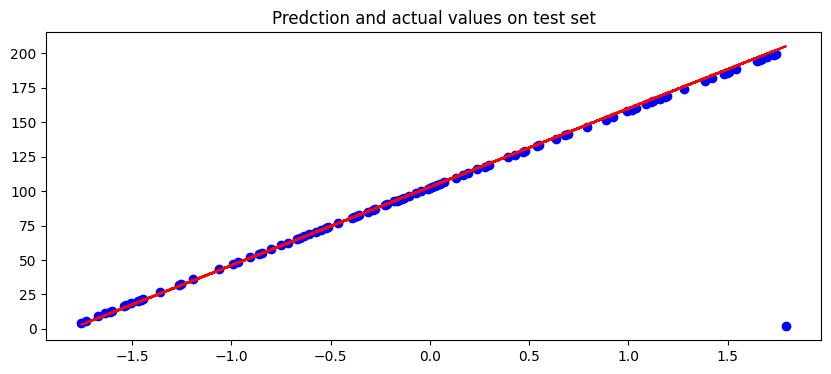

In [3]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train, y_train)
y_pred = mdl.predict(x_test)
r2 = sk.metrics.r2_score(y_test , y_pred) # regression score function, best if 1
mse_test = sk.metrics.mean_squared_error(y_test,y_pred)
print('R2 Score = ',r2)
print('MSE = ',mse_test)

plt.figure(figsize=(10,4))
plt.title("Predction and actual values on test set")
plt.scatter(x_test,y_test, c="blue")
plt.plot(x_test,y_pred, c="red")
plt.show()

In [4]:
mdl.score(x_test,y_test) #accuracy test

0.865207580068512

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Polynomial Regression

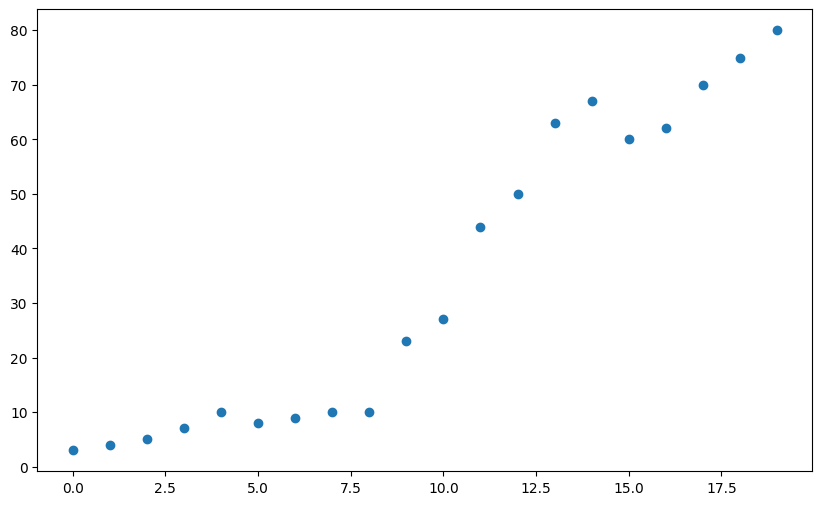

In [5]:
x = np.arange(0,20)
y= [3,4,5,7,10,8,9,10,10,23,27,44,50,63,67,60,62,70,75,80]
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1,1))
mdl.fit(poly_features,y)

LinearRegression()

In [7]:
y_predicted = mdl.predict(poly_features)

In [8]:
y_predicted

array([-1.22792208,  0.79668489,  3.10803144,  5.70611757,  8.59094327,
       11.76250854, 15.2208134 , 18.96585783, 22.99764183, 27.31616541,
       31.92142857, 36.81343131, 41.99217362, 47.4576555 , 53.20987697,
       59.248838  , 65.57453862, 72.18697881, 79.08615858, 86.27207792])

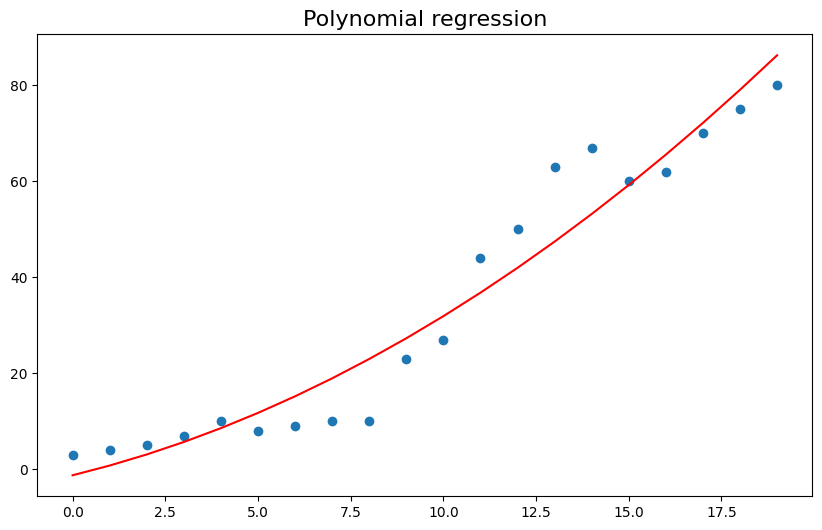

In [9]:
plt.figure(figsize=(10,6))
plt.title("Polynomial regression" ,size = 16)
plt.scatter(x,y)
plt.plot(x, y_predicted, c ="red")
plt.show()

# Lasso Regression

In [10]:
from sklearn.linear_model import Lasso,LassoCV
lasso_cv = LassoCV(alphas=None, cv =10 ,max_iter= 100000) #formula for lsso :  (  1 / ( 2 *n_sample))
lasso_cv.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=100000)

In [11]:
alpha = lasso_cv.alpha_
alpha

0.056967597817242

In [12]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.056967597817242)

In [13]:
lasso.predict(x_test)

array([ 90.18713098,  65.02631801, 113.98790001, 116.7079879 ,
        60.2661642 ,  57.54607631,  17.42477995,  87.46704309,
       181.99009723, 100.38746056, 155.46924031,   4.50436248,
       188.11029498, 112.62785606,  86.78702112,  54.14596645,
         3.14431853, 184.03016315, 199.67066851,  82.70688928,
       162.26946004, 127.58833945,  67.06638392,  80.66682337,
        92.90721887,  20.82488981, 167.02961384, 169.06967976,
       125.54827353, 105.82763634,  68.42642787, 104.4675924 ,
         7.90447234, 141.86880087,  11.3045822 ,  94.26726281,
       118.74805381, 147.98899862, 159.54937215,  42.58559292,
        71.82653773, 103.78757042, 190.83038287,  25.58504362,
        31.02521939,  96.9873507 ,  51.42587856,  35.10535123,
       102.42752648, 201.71073443,  93.58724084, 164.98954792,
         9.94453825, 139.14871298, 197.63060259, 129.62840537,
       130.30842734, 202.3907564 ,  54.82598842, 105.14761437,
        31.70524137, 107.18768028,  16.064736  ,  99.02

In [14]:
lasso.score(x_train,y_train)

0.9425516871712915

In [15]:
mse = np.mean((y_pred - y_test)**2)
mse

419.19504042578507

In [16]:
lasso.score(x_test,y_test)

0.8653827222096552

# Ridge Regression
Do not consider 0 in the data set, values might be near to the zero but not zero

In [17]:
from sklearn.linear_model import Ridge,RidgeCV
alphas = np.random.uniform(0,10,50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(x_train,y_train)


RidgeCV(alphas=array([1.88834355, 0.25465243, 8.83860506, 8.12885779, 7.85364936,
       7.14307985, 7.72603167, 8.27347504, 2.65768669, 5.93258475,
       9.46398008, 2.02144455, 7.31908713, 9.98632156, 9.90046227,
       4.01242203, 5.34296957, 2.96824899, 3.64056607, 8.41317423,
       2.57608727, 9.37903089, 7.56159548, 4.44729503, 8.29081606,
       7.46444011, 0.74309857, 1.26073488, 3.31734392, 0.9684395 ,
       1.06185947, 3.8441001 , 4.23768499, 5.5581457 , 5.5448371 ,
       1.21563244, 2.88757614, 3.18304255, 7.29850918, 8.15491415,
       1.53880615, 5.2745865 , 9.71135732, 3.21693958, 5.56754928,
       8.91431539, 1.55583112, 3.62671916, 8.2534358 , 1.75097067]),
        cv=10)

In [18]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train , y_train)

Ridge(alpha=0.2546524327983901)

In [19]:
ridge.score(x_train,y_train)

0.942551120653833

In [20]:
ridge.score(x_test,y_test)

0.86542884136663